<h1>
<font color="#ff2e2e">
Panorama with OpenCV
</font>
</h1>

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import os

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Read input images from 1 to 8 and show them in a row together </font></h3>

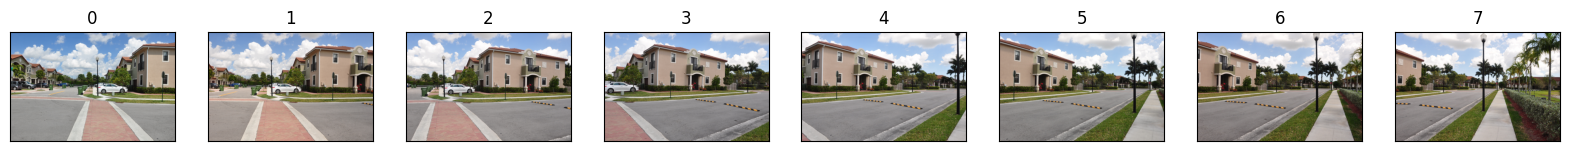

In [4]:
images = [cv2.imread(f"./images/Q2/{i}.jpg") for i in range(1, 9)]
image_list=[]
for i in range(len(images)):
    
    image_list.append( [cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB), f'{i}', 'img'])

plotter(image_list,1 , 8, False, 20, 10)



<h3><font color = "#079e05"> Initialize OpenCV's image sticher object and then perform the image stitching on input images </font></h3>

In [6]:
stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch(images)



<h3><font color = "#079e05"> Show the result </font></h3>

Your Panorama is ready!!!


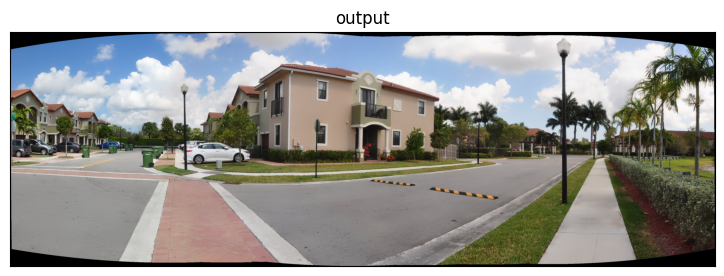

In [12]:
if dummy != cv2.STITCHER_OK:
# checking if the stitching procedure is successful
# .stitch() function returns a true value if stitching is
# done successfully
	print("stitching ain't successful")
else:
	print('Your Panorama is ready!!!')

# final output

 

plotter([[cv2.cvtColor(output,cv2.COLOR_BGR2RGB), 'output', 'img']],1,2, False, 20, 10)
